# Race Prediction Machine Learning Model
C964 Computer Science Capstone  
Western Governors University  
Russell Taylor  
December 6, 2020

## Import Tools
#### Import Pandas, NumPy, and Matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Set Random Seed

In [3]:
np.random.seed(45)

## Import Data

In [4]:
import glob
import os
path = r'race_results'
all_files = glob.glob(os.path.join(path, "*.csv"))

race_results = pd.concat((pd.read_csv(f) for f in all_files), ignore_index = True)
race_results.head()
# pd.set_option('display.max_rows', None)

,Race,Year,Cutoff,Place,First,Last,City,Location,Age,Gender,GP,Time,Rank
0,Javelina,2020,30,1,Tim,Tollefson,Mammoth Lakes,CA,35,M,1,13:28:04,96.84
1,Javelina,2020,30,2,Nick,Coury,Scottsdale,AZ,33,M,2,14:09:48,84.03
2,Javelina,2020,30,3,Nicole,Bitter,Phoenix,AZ,38,F,1,15:17:47,94.22
3,Javelina,2020,30,4,Darce,Claus,Bonners Ferry,ID,49,F,2,15:58:45,95.29
4,Javelina,2020,30,5,Sean,Van Horn,Carbondale,CO,34,M,3,16:01:10,90.22


In [5]:
race_results["Time"]

0        13:28:04
1        14:09:48
2        15:17:47
3        15:58:45
4        16:01:10
           ...   
12269    32:28:39
12270    32:33:20
12271    32:36:58
12272    32:42:04
12273    32:43:12
Name: Time, Length: 12274, dtype: object

## Clean Data
#### Convert Finish Times to Integers

In [6]:
race_results["Time"] = pd.to_timedelta(race_results["Time"]).dt.total_seconds()

#### Remove DNFs and DNSs

In [7]:
race_results = race_results[race_results["Place"] > 0]
len(race_results)

11679

#### Remove Erroneous Finish Times 

In [8]:
race_results = race_results[race_results["Time"] > 43200]
outlier = race_results[race_results["Race"] == "Cascade Crest"]
race_results.drop(outlier[outlier["Time"] > 144000].index, inplace = True)
len(race_results)

11667

#### Fill Null Fields

In [9]:
race_results.fillna("INTL", inplace = True)

## Descriptive Data Method: Randomized PCA
#### Remove Extraneous Columns

In [10]:
df = race_results.drop(["First", "Last", "City", "Place", "GP"], 
                       axis = 1)

#### Convert Categorical Features to Numerical Form

In [11]:
df["Race"] = pd.Categorical(df["Race"])
df["Race"] = df["Race"].cat.codes
df["Location"] = pd.Categorical(df["Location"])
df["Location"] = df["Location"].cat.codes
df["Gender"] = pd.Categorical(df["Gender"])
df["Gender"] = df["Gender"].cat.codes

#### Split the Data into Features and Labels

In [12]:
df_shuffled = df.sample(frac = 1)
x = df_shuffled.drop("Time", axis = 1)
y = df_shuffled["Time"]

#### Split the Data into Training and Test Sets

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

#### Normalize the Feature Set with Standard Scalar Normalization

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### Run the Randomized PCA Algorithm

In [15]:
from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

#### Display Explained Variance

In [16]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.20713157, 0.20398593, 0.1534491 , 0.13584216, 0.12970981,
       0.08996371, 0.07991773])

## Display data
#### Finish Times by Race

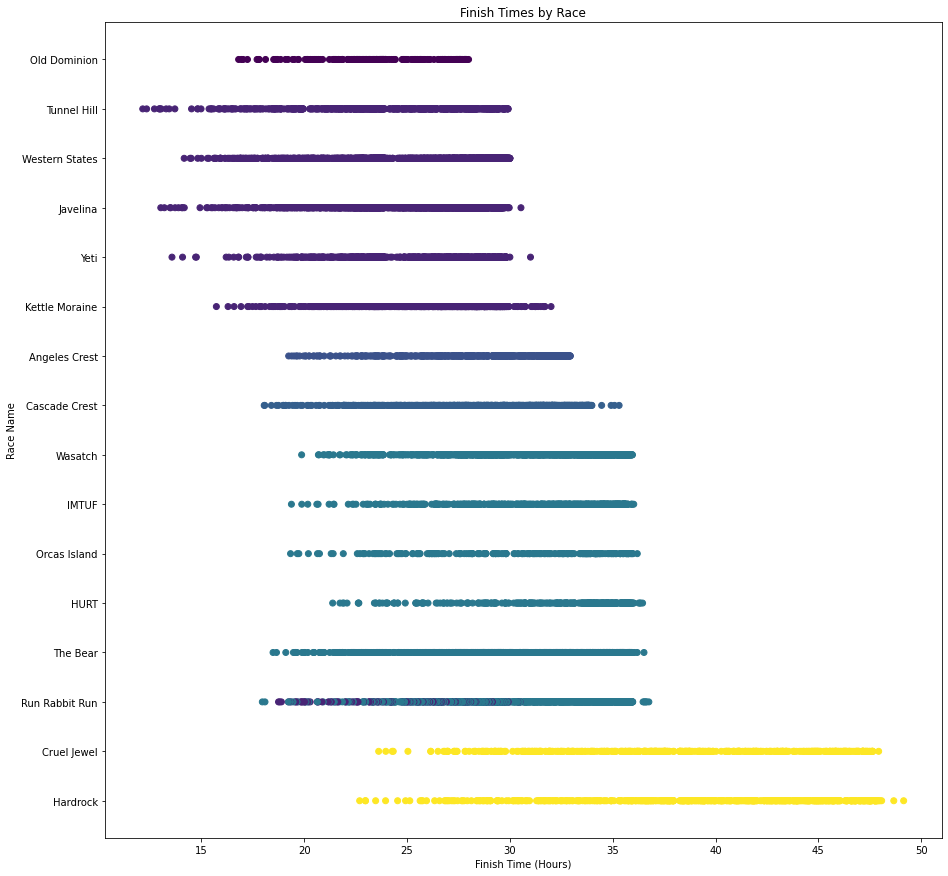

In [67]:
display = race_results.sort_values(by = "Time", ascending = False)
fig, ax = plt.subplots(figsize = (15, 15))
ax.scatter(display["Time"] / 3600, 
           display["Race"], 
           c = display["Cutoff"])
ax.set(title = "Finish Times by Race",
       xlabel = "Finish Time (Hours)",
       ylabel = "Race Name")
fig.savefig("images/sample-plot.png")
plt.show()

#### Finish Times by Rank

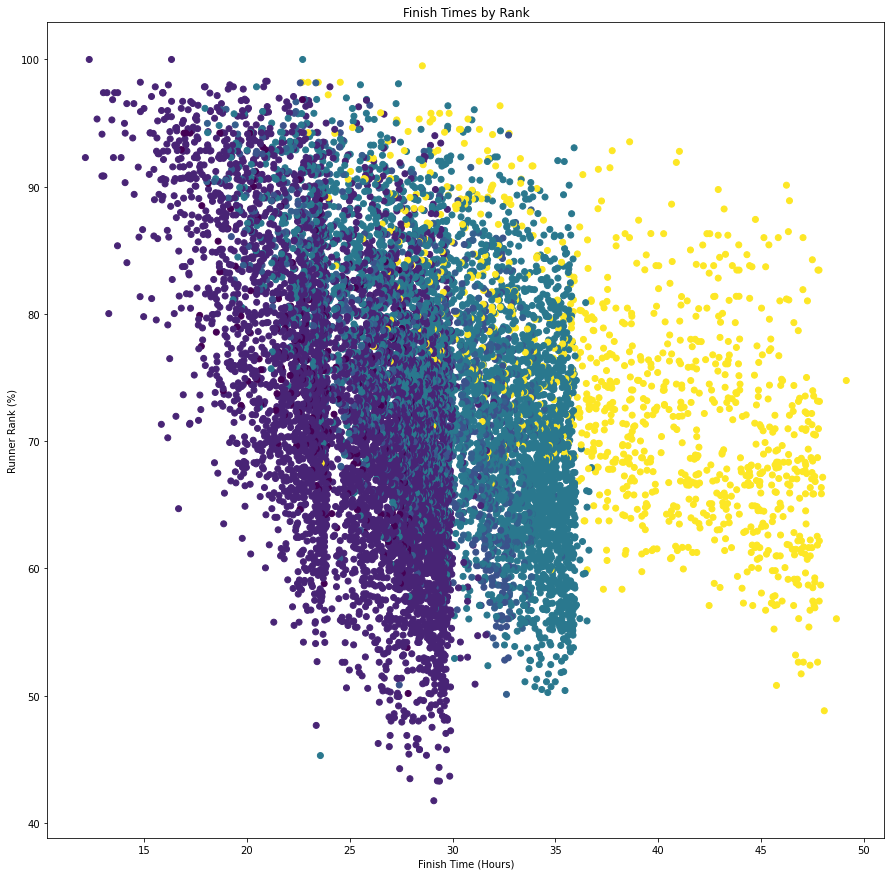

In [63]:
display = race_results.sort_values(by = "Time", ascending = False)
fig, ax = plt.subplots(figsize = (15, 15))
ax.scatter(display["Time"] / 3600, 
           display["Rank"], 
           c = display["Cutoff"])
ax.set(title = "Finish Times by Rank",
       xlabel = "Finish Time (Hours)",
       ylabel = "Runner Rank (%)")
fig.savefig("images/sample-plot.png")
plt.show()

In [18]:
race_results["Race"] = pd.Categorical(race_results["Race"])
race_results["RaceID"] = race_results["Race"].cat.codes
race_results

,Race,Year,Cutoff,Place,First,Last,City,Location,Age,Gender,GP,Time,Rank,RaceID
0,Javelina,2020,30,1,Tim,Tollefson,Mammoth Lakes,CA,35,M,1,48484.0,96.84,6
1,Javelina,2020,30,2,Nick,Coury,Scottsdale,AZ,33,M,2,50988.0,84.03,6
2,Javelina,2020,30,3,Nicole,Bitter,Phoenix,AZ,38,F,1,55067.0,94.22,6
3,Javelina,2020,30,4,Darce,Claus,Bonners Ferry,ID,49,F,2,57525.0,95.29,6
4,Javelina,2020,30,5,Sean,Van Horn,Carbondale,CO,34,M,3,57670.0,90.22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12269,Angeles Crest,2015,33,94,Peter,Hulbert,Edina,MN,36,M,74,116919.0,59.48,0
12270,Angeles Crest,2015,33,95,Tim,Steele,San Ramon,CA,53,M,75,117200.0,66.83,0
12271,Angeles Crest,2015,33,96,John,Kawaharada,Los Angeles,CA,47,M,76,117418.0,66.26,0
12272,Angeles Crest,2015,33,97,Ryan,Launder,Landers,CA,39,M,77,117724.0,68.24,0


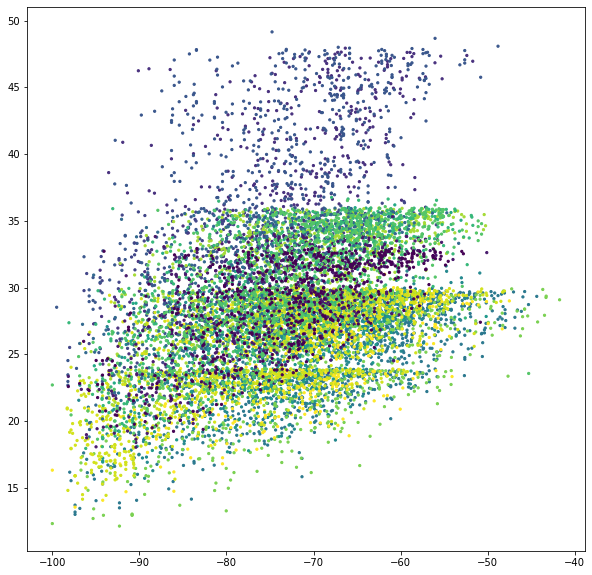

In [19]:
# display = race_results[race_results["RaceID"] == 8]
display = race_results
fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(x = -display["Rank"], 
           y = display["Time"] / 3600,
           c = display["RaceID"],
           s = 5)
# race_results.set(title = "Finish Times by Race",
#        xlabel = "Finish Time (Hours)",
#        ylabel = "Race Name")
plt.show()

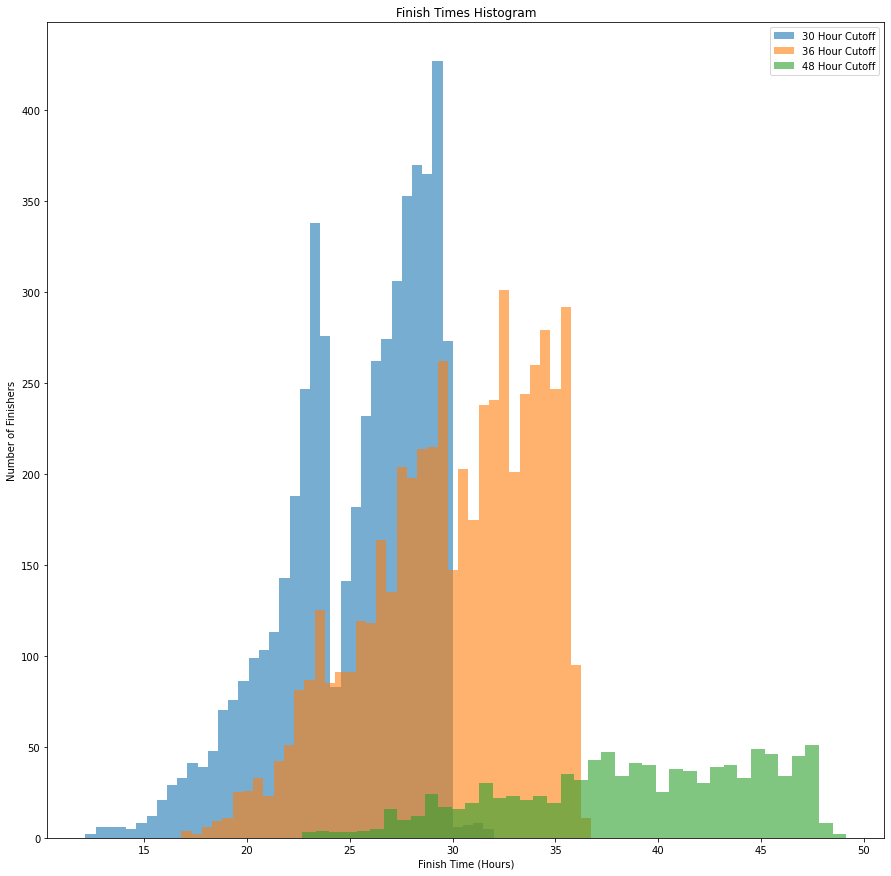

In [91]:
# display = race_results[race_results["RaceID"] == 8]

display = race_results
fig, ax = plt.subplots(figsize = (15, 15))

# display = race_results

a = display[display["Cutoff"] == 30]
b = display[display["Cutoff"] == 48]
c = display.drop(a.index).drop(b.index)

ax.hist(a["Time"] / 3600, alpha = 0.6, bins = 40)
ax.hist(c["Time"] / 3600, alpha = 0.6, bins = 40)
ax.hist(b["Time"] / 3600, alpha = 0.6, bins = 40)

plt.legend(["30 Hour Cutoff", "36 Hour Cutoff", "48 Hour Cutoff"])
plt.ylabel("Number of Finishers")
plt.xlabel("Finish Time (Hours)")
plt.title("Finish Times Histogram") 
plt.show()

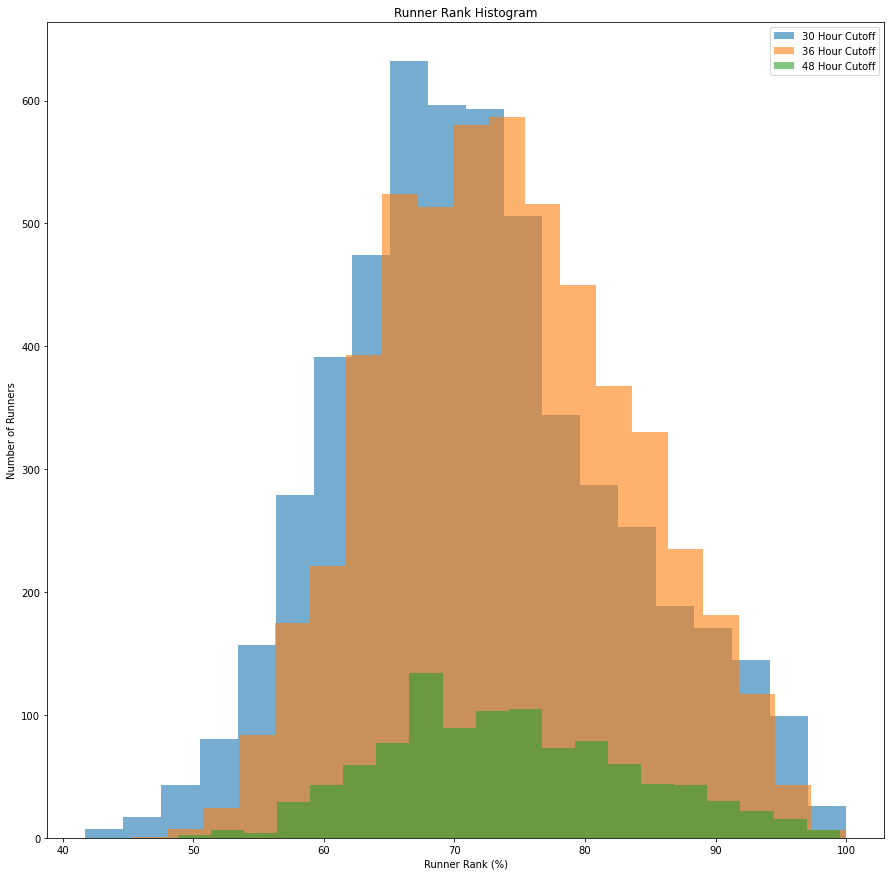

In [88]:
display = race_results
fig, ax = plt.subplots(figsize = (15, 15))

# display = race_results

a = display[display["Cutoff"] == 30]
b = display[display["Cutoff"] == 48]
c = display.drop(a.index).drop(b.index)

ax.hist(a["Rank"], alpha = 0.6, bins = 20)
ax.hist(c["Rank"], alpha = 0.6, bins = 20)
ax.hist(b["Rank"], alpha = 0.6, bins = 20)

plt.legend(["30 Hour Cutoff", "36 Hour Cutoff", "48 Hour Cutoff"])
plt.ylabel("Number of Runners")
plt.xlabel("Runner Rank (%)")
plt.title("Runner Rank Histogram") 
plt.show()

## Non-Descriptive Data Method: Random Forest Regression
#### Remove Extraneous Columns

In [21]:
df = race_results.drop(["Race", "Year", "First", "Last", "City", "Location", "Place", "GP"], 
                  axis = 1)

#### Split the Data into Features and Labels

In [22]:
df_shuffled = df.sample(frac = 1)
x = df_shuffled.drop("Time", axis = 1)
y = df_shuffled["Time"]

#### Convert Categorical Features into Numerical Form

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Gender"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], 
                                remainder = "passthrough")
x = transformer.fit_transform(x)

#### Split the Data into Training and Test Sets

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#### Run the Random Forest Regression Algorithm

In [25]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

## Evaluation
#### Training Set Evalualtion: R²

In [26]:
model.score(x_train, y_train)

0.9686880825856322

#### Test Set Evalualtion: R²

In [27]:
model.score(x_test, y_test)

0.7908212784811544

#### Calculate the Mean Absolute Error

In [28]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)

pd.to_timedelta(mae, unit = "s")

Timedelta('0 days 02:02:06.679481725')

In [29]:
df = pd.DataFrame()
df["Predicted"] = pd.to_timedelta(y_preds.round(0), unit = "s")
df["Actual"] = pd.to_timedelta(np.array(y_test), unit = "s")
df["Difference"] = abs(df["Predicted"] - df["Actual"])
# max_df = df[df["Difference"] > '1 days']
df

,Predicted,Actual,Difference
0,1 days 04:48:47,1 days 02:45:03,0 days 02:03:44
1,0 days 21:23:40,0 days 21:38:12,0 days 00:14:32
2,1 days 09:28:28,1 days 08:18:11,0 days 01:10:17
3,1 days 02:40:17,1 days 04:39:56,0 days 01:59:39
4,1 days 06:04:41,1 days 07:11:44,0 days 01:07:03
...,...,...,...
2329,1 days 09:49:55,1 days 05:11:47,0 days 04:38:08
2330,1 days 10:19:59,1 days 09:48:11,0 days 00:31:48
2331,1 days 09:09:59,1 days 05:17:56,0 days 03:52:03
2332,0 days 22:22:15,0 days 23:11:42,0 days 00:49:27


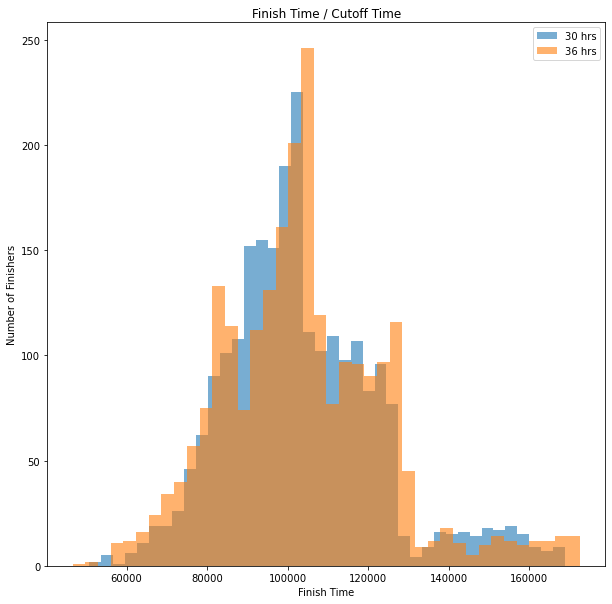

In [30]:
display = df
fig, ax = plt.subplots(figsize = (10, 10))

# a = display[display["Cutoff"] == 30]
# b = display[display["Cutoff"] == 48]
# c = display.drop(a.index).drop(b.index)


ax.hist(y_preds, alpha = 0.6, bins = 40)
ax.hist(y_test, alpha = 0.6, bins = 40)

plt.legend(["30 hrs", "36 hrs", "48 hrs"])
plt.ylabel("Number of Finishers")
plt.xlabel("Finish Time")
plt.title("Finish Time / Cutoff Time") 
plt.show()

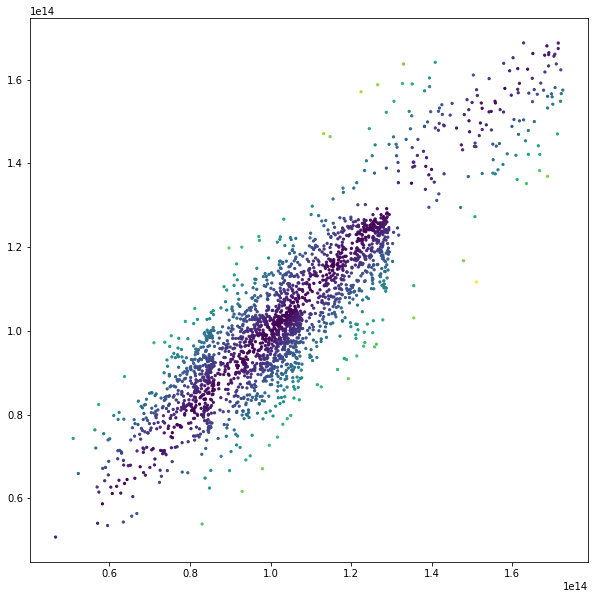

In [31]:
display = df
display["index"] = display.index
fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(x = display["Actual"], 
           y = display["Predicted"],
           c = display["Difference"],
           s = 5)
# race_results.set(title = "Finish Times by Race",
#        xlabel = "Finish Time (Hours)",
#        ylabel = "Race Name")
plt.show()

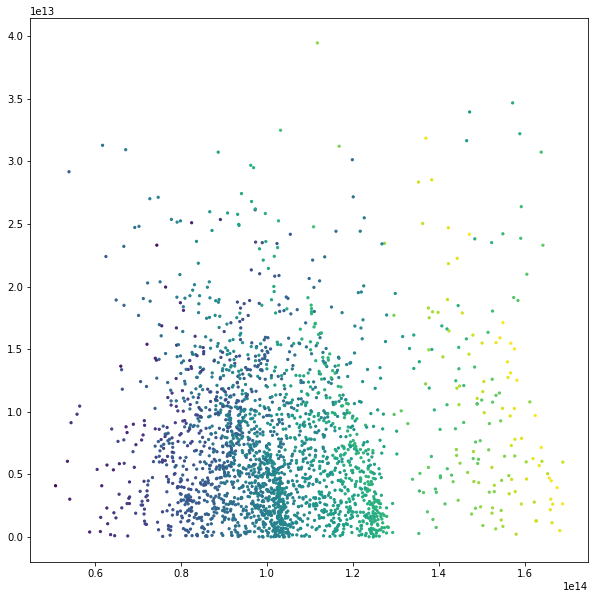

In [32]:
display = df
display["index"] = display.index
fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(x = display["Predicted"], 
           y = display["Difference"],
           c = display["Actual"],
           s = 5)
# race_results.set(title = "Finish Times by Race",
#        xlabel = "Finish Time (Hours)",
#        ylabel = "Race Name")
plt.show()

In [33]:
display = df
display.sort_values("Predicted", inplace=True)
display.reset_index(drop = True, inplace = True)
display

,Predicted,Actual,Difference,index
0,0 days 14:05:14,0 days 12:56:53,0 days 01:08:21,2246
1,0 days 14:51:17,0 days 16:32:10,0 days 01:40:53,2098
2,0 days 14:57:16,0 days 23:03:11,0 days 08:05:55,2189
3,0 days 15:00:21,0 days 15:50:52,0 days 00:50:31,305
4,0 days 15:05:15,0 days 17:37:25,0 days 02:32:10,1874
...,...,...,...,...
2329,1 days 22:14:19,1 days 22:58:12,0 days 00:43:53,2123
2330,1 days 22:31:04,1 days 23:36:49,0 days 01:05:45,96
2331,1 days 22:41:22,1 days 22:50:02,0 days 00:08:40,23
2332,1 days 22:52:40,1 days 23:36:54,0 days 00:44:14,1000


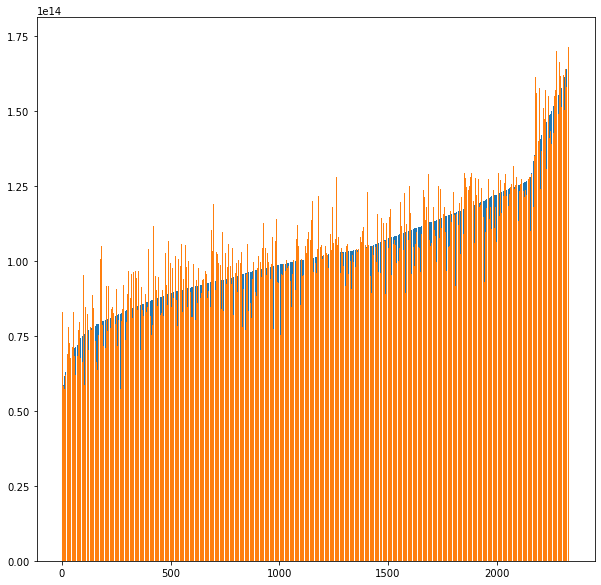

In [34]:
display["index"] = display.index
fig, ax = plt.subplots(figsize = (10, 10))
# ax.bar(y_preds.index, y_preds)
ax.bar(display["index"], display["Predicted"])
ax.bar(display["index"], display["Actual"])
# race_results.set(title = "Finish Times by Race",
#        xlabel = "Finish Time (Hours)",
#        ylabel = "Race Name")
plt.show()

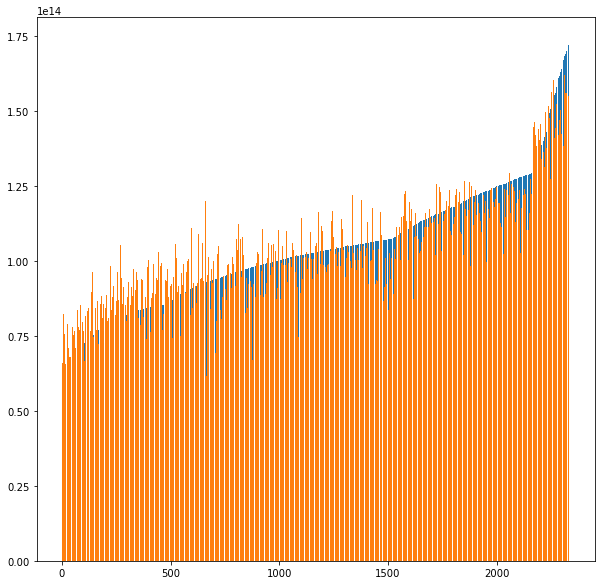

In [35]:
display = df
display.sort_values(by = ["Actual"], inplace = True)
display.reset_index(drop = True, inplace = True)
display["index"] = display.index
fig, ax = plt.subplots(figsize = (10, 10))
ax.bar(display["index"], display["Actual"])
ax.bar(display["index"], display["Predicted"])
# race_results.set(title = "Finish Times by Race",
#        xlabel = "Finish Time (Hours)",
#        ylabel = "Race Name")
plt.show()

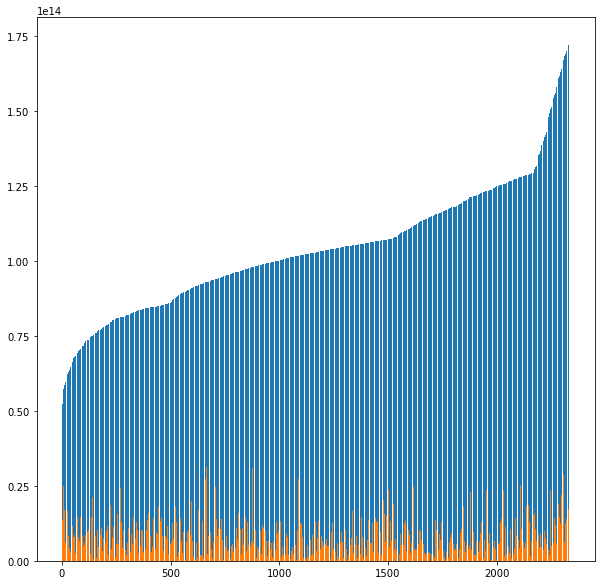

In [36]:
display = df
display.sort_values("Actual", inplace=True)
display.reset_index(drop = True, inplace = True)
display["index"] = display.index
fig, ax = plt.subplots(figsize = (10, 10))
ax.bar(display["index"], display["Actual"])
ax.bar(display["index"], display["Difference"])
# race_results.set(title = "Finish Times by Race",
#        xlabel = "Finish Time (Hours)",
#        ylabel = "Race Name")
plt.show()

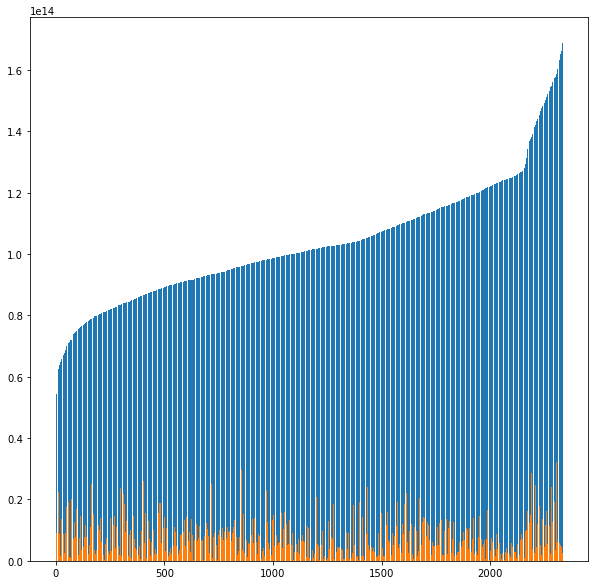

In [37]:
display = df
display.sort_values("Predicted", inplace=True)
display.reset_index(drop = True, inplace = True)
display["index"] = display.index
fig, ax = plt.subplots(figsize = (10, 10))
ax.bar(display["index"], display["Predicted"])
ax.bar(display["index"], display["Difference"])
# race_results.set(title = "Finish Times by Race",
#        xlabel = "Finish Time (Hours)",
#        ylabel = "Race Name")
plt.show()